ANALYSING A FINANCIAL DATA SET 

This is a dataset that requires a lot of preprocessing with amazing EDA insights for a company. A dataset consisting of sales and profit data sorted by market segment and country/region.

In [79]:
#import libraries

# Import libraries that we will use in data processing

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from datetime import date, timedelta  # Import date and timedelta from datetime
import matplotlib.pyplot as plt # visualising data
import seaborn as sns

In [82]:
financials = pd.read_csv('financials.csv')
print(financials.head(5))

      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-      $32,670.00    
3                $3.00       $15.00    $13,320.00        $-      $13,320.00    
4                $3.00       $15.00    $37,050.00        $-      $37,050.00    

          COGS        Profit         Date  Month Number  Month Name   Year  
0   $16,185.00    $16,185.00   01

In [84]:

print(financials.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [86]:
print(financials.columns.tolist)


<bound method IndexOpsMixin.tolist of Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')>


In [88]:
#Notice there are many leading & trailing spaces, remove them from the columns

financials.columns = financials.columns.str.strip()
print(financials.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')>


In [ ]:


def auto_clean_currency(df):
    """
    Automatically detect object columns that look like money and clean them:
    - Removes $, commas, spaces
    - Converts (1234.50) → -1234.50
    - Converts empty strings or invalid to NaN
    - Converts to float
    """
    obj_cols = df.select_dtypes(include="object").columns

    # Detect potential currency columns
    currency_cols = [
        col for col in obj_cols
        if df[col].astype(str).str.contains(r'[\$,()]').any()
    ]

    for col in currency_cols:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()                                # remove spaces
            .replace('', np.nan)                         # empty strings → NaN
            .str.replace(r'[\$,]', '', regex=True)      # remove $ and commas
            .str.replace(r'^\((.*)\)$', r'-\1', regex=True)  # (1234.50) → -1234.50
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')   # convert to float, invalid → NaN
    
    return df, currency_cols



In [92]:
financials, cleaned_cols = auto_clean_currency(financials)
print("Cleaned currency columns:", cleaned_cols)
print(financials.dtypes)


Cleaned currency columns: []
Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object


In [119]:
#Clean the Data

print(financials.isna().sum())
financials.fillna(0, inplace=True)
financials.drop_duplicates(inplace=True)
financials.shape 

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
Week                   0
Profit Margin          0
Discount Effect        0
dtype: int64


(700, 19)

['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Month Number', 'Year']
0 Units Sold
1 Manufacturing Price
2 Sale Price
3 Gross Sales
4 Discounts
5 Sales
6 COGS
7 Profit


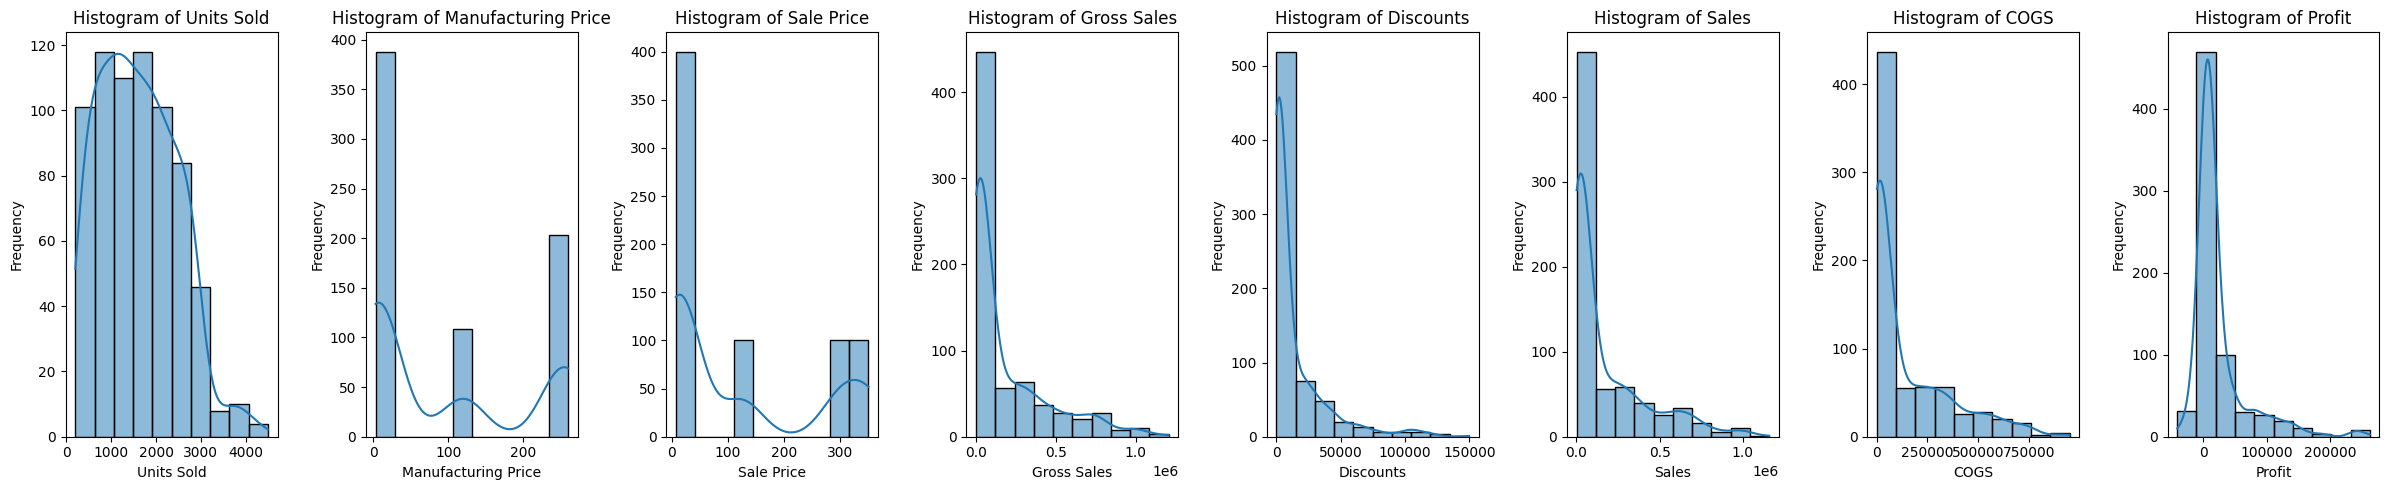

In [96]:

numeric_columns = financials.select_dtypes(include='number').columns.tolist()
print(numeric_columns)


#Plot histograms for each numeric column
plt.figure(figsize=(30, 5))
columns_to_exclude = ['Month Number', 'Year', 'Date', 'Week']  # columns you want to skip

for i, column in enumerate([col for col in numeric_columns if col not in columns_to_exclude]):
    print(i, column)

    plt.subplot(1, len(numeric_columns), i + 1)
    sns.histplot(financials[column].dropna(), bins=10, kde=True)  # Drop NaNs for plotting
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [98]:
financials['Date'] = pd.to_datetime(financials['Date'], format='%d/%m/%Y')

# Assuming 'Date' column is already in datetime format
financials['Year'] = financials['Date'].dt.year
financials['Month Number'] = financials['Date'].dt.month
financials['Week'] = financials['Date'].dt.isocalendar().week

print(financials)


              Segment                   Country      Product Discount Band  \
0          Government                    Canada   Carretera          None    
1          Government                   Germany   Carretera          None    
2           Midmarket                    France   Carretera          None    
3           Midmarket                   Germany   Carretera          None    
4           Midmarket                    Mexico   Carretera          None    
..                ...                       ...          ...           ...   
695    Small Business                    France    Amarilla          High    
696    Small Business                    Mexico    Amarilla          High    
697        Government                    Mexico     Montana          High    
698        Government                    Canada       Paseo          High    
699  Channel Partners  United States of America         VTT          High    

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  

Profit Margin (%) = Profit / Revenue * 100


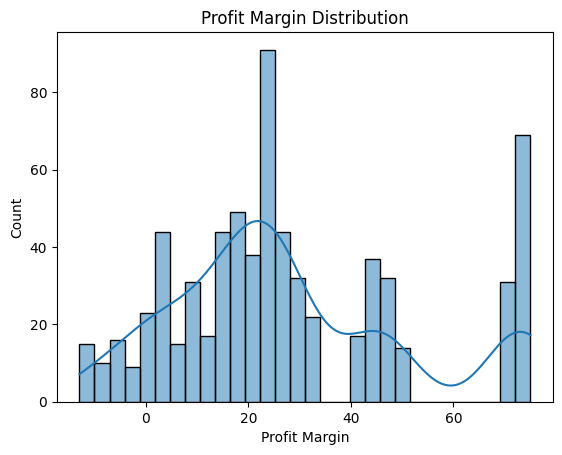

In [99]:
#Profit Margin
financials['Profit Margin'] = round(financials['Profit'] / financials['Sales'] * 100, 2)


sns.histplot(financials['Profit Margin'], bins=30, kde=True)
plt.title("Profit Margin Distribution")
plt.show()

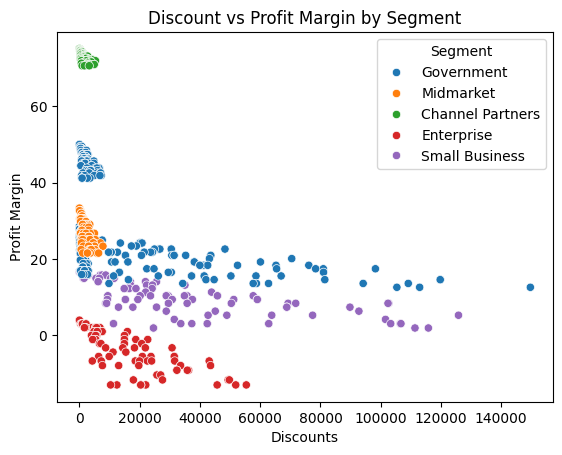

In [100]:
#Discount effect 

financials['Discount Effect'] = financials['Discounts'] / financials['Gross Sales'] * 100

sns.scatterplot(x='Discounts', y='Profit Margin', hue='Segment', data=financials)
plt.title("Discount vs Profit Margin by Segment")
plt.show()




In [101]:
#Encode Categorical Features (future use)

financials_encoded = pd.get_dummies(financials, columns=['Segment', 'Discount Band'], drop_first=True)


Descriptive Statistics & EDA

In [102]:
excluded = ['Date', 'Month Number', 'Year', 'Week']
print(financials[[x for x in financials.columns if x not in excluded]].describe())


        Units Sold  Manufacturing Price  Sale Price   Gross Sales  \
count   700.000000           700.000000  700.000000  7.000000e+02   
mean   1608.294286            96.477143  118.428571  1.827594e+05   
std     867.427859           108.602612  136.775515  2.542623e+05   
min     200.000000             3.000000    7.000000  1.799000e+03   
25%     905.000000             5.000000   12.000000  1.739175e+04   
50%    1542.500000            10.000000   20.000000  3.798000e+04   
75%    2229.125000           250.000000  300.000000  2.790250e+05   
max    4492.500000           260.000000  350.000000  1.207500e+06   

           Discounts         Sales           COGS         Profit  \
count     700.000000  7.000000e+02     700.000000     700.000000   
mean    13150.354671  1.696091e+05  145475.211429   24133.860414   
std     22962.928760  2.367263e+05  203865.506118   42760.626547   
min         0.000000  1.655080e+03     918.000000  -40617.500000   
25%       800.320000  1.592800e+04    

Aggregations & Grouping

In [103]:
#Function to plot sales and profits vs feature

def plot_sales_profit(df, category):
    """
    Plots total Sales and Profit for a given category (e.g. 'Segment', 'Country', 'Product').
    """
    # Step 1: Summarize Sales & Profit by the given category
    summary = df.groupby(category)[['Sales','Profit']].sum().reset_index()
    
    # Step 2: Melt into long format
    melted = summary.melt(id_vars=category, 
                          value_vars=['Sales','Profit'], 
                          var_name='Metric', 
                          value_name='Amount')
    
    # Step 3: Plot
    plt.figure(figsize=(12,6))
    sns.barplot(x=category, y="Amount", hue="Metric", data=melted)
    plt.title(f"Total Sales & Profit by {category}")
    plt.ylabel("Amount")
    plt.xticks(rotation=45)  # rotate if labels are long
    plt.show()
    
    



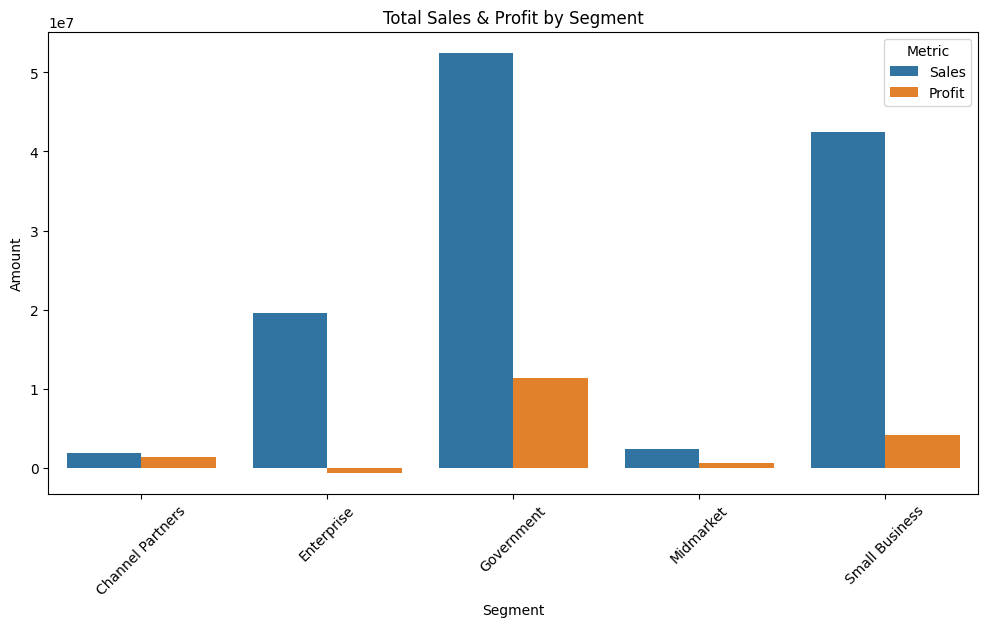

In [104]:
#By Segment
plot_sales_profit(financials, "Segment")

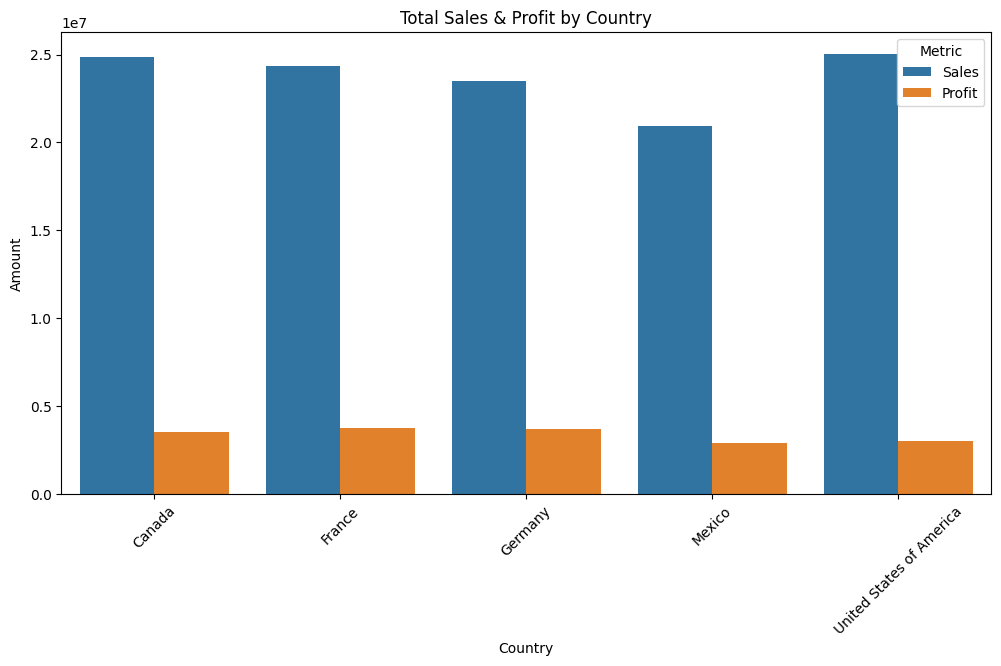

In [105]:
#By Country

plot_sales_profit(financials, "Country")

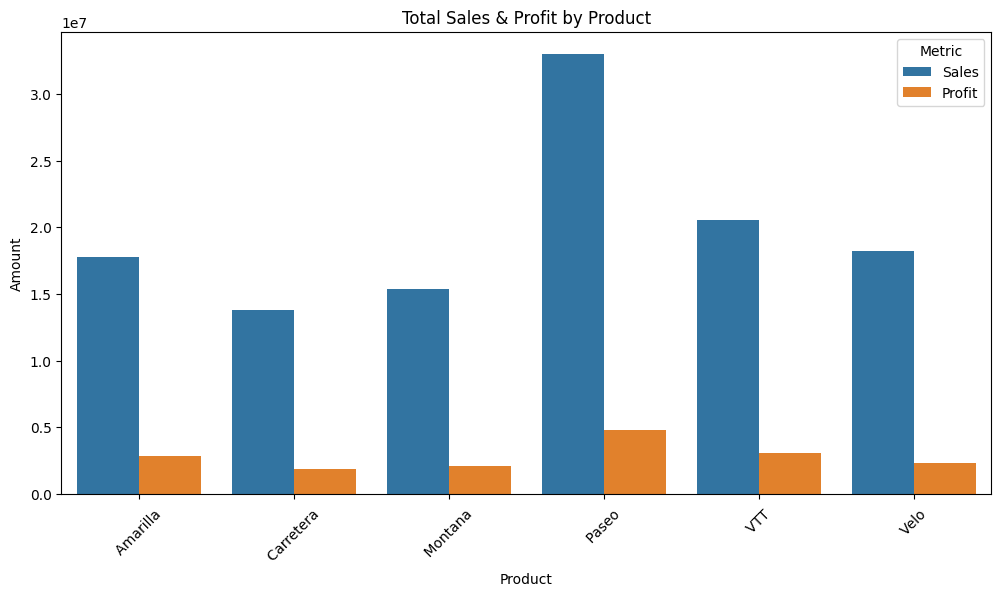

In [106]:
#By Product
plot_sales_profit(financials, "Product")

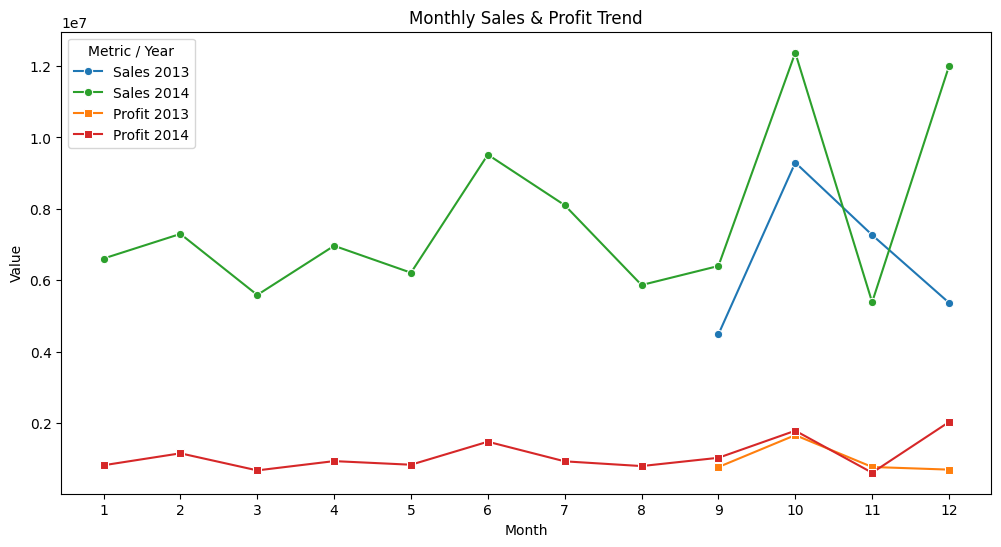

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aggregate monthly Sales and Profit
monthly = financials.groupby(['Year', 'Month Number'])[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(12,6))
ax1 = plt.gca()

# Define custom colors for clarity
sales_palette = ['#1f77b4', '#2ca02c', '#17becf']  # add more if you have more years
profit_palette = ['#ff7f0e', '#d62728', '#9467bd']

years = monthly['Year'].unique()

# Plot Sales lines
for i, year in enumerate(years):
    sns.lineplot(
        data=monthly[monthly['Year']==year],
        x='Month Number', y='Sales',
        marker='o',
        color=sales_palette[i % len(sales_palette)],
        label=f"Sales {year}",
        ax=ax1
    )

# Plot Profit lines
for i, year in enumerate(years):
    sns.lineplot(
        data=monthly[monthly['Year']==year],
        x='Month Number', y='Profit',
        marker='s',
        color=profit_palette[i % len(profit_palette)],
        label=f"Profit {year}",
        ax=ax1
    )

# Labels, title, and x-ticks
ax1.set_xlabel('Month')
ax1.set_ylabel('Value')
ax1.set_xticks(range(1,13))
ax1.set_title("Monthly Sales & Profit Trend")

# Combined legend
ax1.legend(title="Metric / Year")
plt.show()


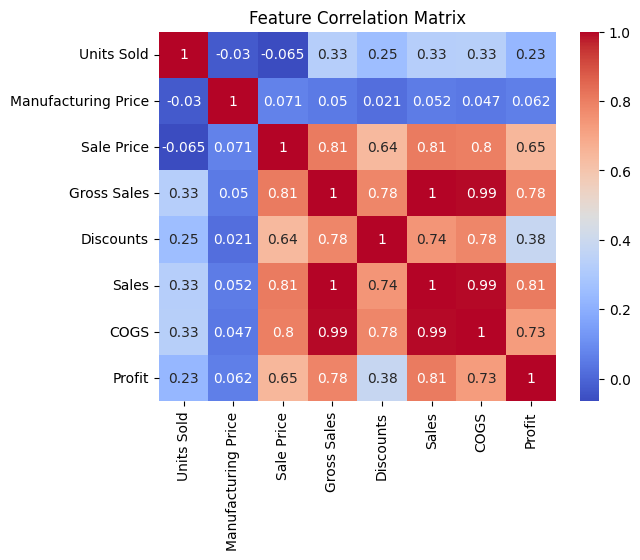

In [23]:
corr = financials[['Units Sold','Manufacturing Price','Sale Price','Gross Sales','Discounts','Sales','COGS','Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


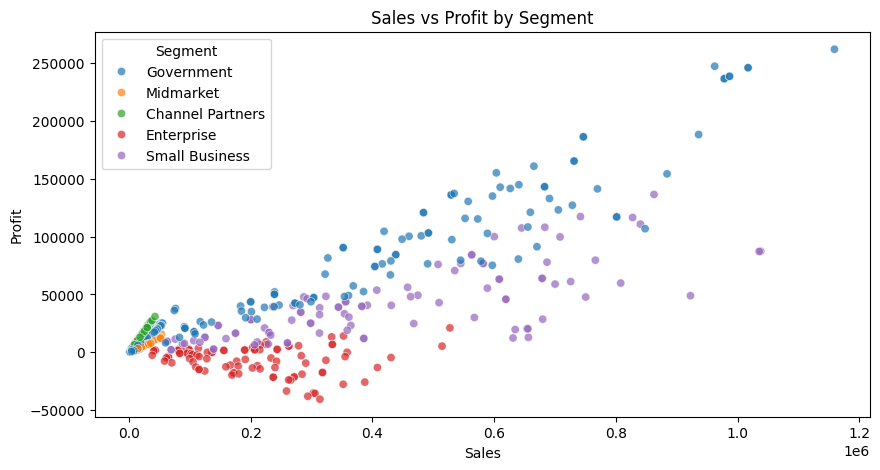

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Sales', y='Profit', hue='Segment', data=financials, alpha=0.7)
plt.title("Sales vs Profit by Segment")
plt.show()

#Are high sales always profitable?

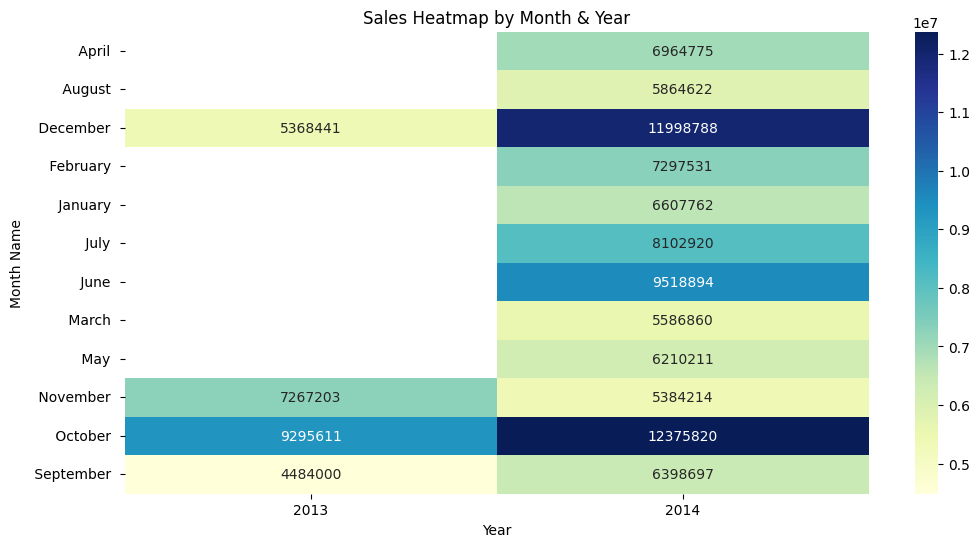

In [ ]:
pivot = financials.pivot_table(values='Sales', index='Month Name', columns='Year', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap by Month & Year")
plt.show()

#Do sales/profits vary across months & years in a clear pattern?

Mini AI Reasoning / Insights

In [116]:
# Total sales and profit per country
country_totals = financials.groupby('Country')[['Sales','Profit']].sum()

# Country with highest sales
top_sales_country = country_totals['Sales'].idxmax()
top_sales_amount = country_totals['Sales'].max()

# Country with highest profit
top_profit_country = country_totals['Profit'].idxmax()
top_profit_amount = country_totals['Profit'].max()

print(f"Highest Sales: {top_sales_country} → ${top_sales_amount:,.2f}")
print(f"Highest Profit: {top_profit_country} → ${top_profit_amount:,.2f}")

#Why: Companies want to know which markets are most valuable.


Highest Sales: United States of America → $25,029,830.18
Highest Profit: France → $3,781,020.79


In [121]:
low_margin_products = financials.nsmallest(5, 'Profit Margin')[['Product','Profit Margin','Segment']]
print("Lowest Profit Margin Products:")
print(low_margin_products)

#Why: Identify products that sell but give poor margins — potential pricing or cost issues.

Lowest Profit Margin Products:
         Product  Profit Margin     Segment
666   Carretera          -12.94  Enterprise
667   Carretera          -12.94  Enterprise
668   Carretera          -12.94  Enterprise
676       Paseo          -12.94  Enterprise
684        Velo          -12.94  Enterprise


In [124]:
yearly = financials.groupby('Year')[['Sales','Profit']].sum()
yearly['Profit_Margin'] = (yearly['Profit']/yearly['Sales'])*100

print("Yearly Performance:")
print(yearly)

#Why: Shows growth or decline trends; helps planning and forecasting.

Yearly Performance:
            Sales       Profit  Profit_Margin
Year                                         
2013  26415255.51   3878464.51      14.682669
2014  92311094.78  13015237.78      14.099321


In [ ]:
# Correlation between discounts and profit margin
discount_corr = financials['Discounts'].corr(financials['Profit Margin'])
print(f"Correlation between Discounts & Profit Margin: {discount_corr:.2f}")

#Why: Detect if discounting strategy is hurting profitability.

Correlation between Discounts & Profit Margin: -0.41


In [133]:
segment_summary = financials.groupby('Segment')[['Sales','Profit']].sum()
segment_summary['Avg_Profit_Margin'] = financials.groupby('Segment')['Profit Margin'].mean()
print(segment_summary)

#Shows which customer segments are most profitable.

                        Sales       Profit  Avg_Profit_Margin
Segment                                                      
Channel Partners   1800593.64   1316803.14            73.0232
Enterprise        19611694.38   -614545.62            -3.0567
Government        52504260.68  11388173.18            29.3306
Midmarket          2381883.09    660103.09            27.6746
Small Business    42427918.50   4143168.50             9.6699


In [137]:
monthly = financials.groupby('Month Name')[['Sales','Profit']].sum()
lowest_sales_month = monthly['Sales'].idxmin()
print(f"Month with lowest sales: {lowest_sales_month}")

#Time-Based Alerts / Queries

Month with lowest sales:  March 


In [138]:
top_products = financials.groupby(['Segment','Product'])['Profit'].sum().sort_values(ascending=False).groupby(level=0).head(3)
print("Top 3 Products per Segment by Profit:")
print(top_products)


Top 3 Products per Segment by Profit:
Segment           Product   
Government        Paseo         3057290.71
                  Amarilla      2208301.61
                  VTT           1840653.71
Small Business    Paseo         1231309.50
                  VTT            982150.00
                  Montana        743313.50
Channel Partners  Paseo          331838.40
Midmarket         Paseo          258739.35
Channel Partners  Amarilla       230068.50
                  VTT            219765.96
Midmarket         Carretera       94105.00
                  VTT             91120.85
Enterprise        Montana        -31096.25
                  Paseo          -81740.00
                  Velo           -84762.50
Name: Profit, dtype: float64
